# Google Trend with PyTrend

https://justaprogrammerpassingby.blogspot.com/2019/01/google-trends-api.html

https://ichi.pro/ko/pytrends-apileul-sayonghayeo-google-teulendeu-deiteoleul-eodneun-bangbeob-74185573051018

<img src ='https://images.unsplash.com/photo-1520006403909-838d6b92c22e?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=60&raw_url=true&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZmFzaGlvbiUyMHRyZW5kc3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
from pytrends.request import TrendReq
import pandas as pd

In [3]:
# hl = host language, tz = timezone
pytrends = TrendReq(hl='ko', tz=540)

In [4]:
pytrends.trending_searches(pn='south_korea')

,0
0,40대여배우 살인미수
1,송강호
2,채영인
3,장윤주
4,강남
5,하이브
6,추성훈
7,버즈 라이트이어
8,비상선언
9,공구우먼


- google trend data를 pandas data type으로 우선, build_payload를 통해 읽어올 trend data의 속성을 정의한다.
- 이후 시간에 따른 키워드 관심도(interest_over_time)를 google trend에 요청하고, 해당 data를 pandas type

- keywords = 4.에서 입력한 keywords와 동일하다.
- cat = 카테고리 범주. 내 검색 데이터를 가져올 때, 내 데이터가 속한 범주를 제한하는 인자다. 카테고리 참조. 0을 입력하면 카테고리 범주 옵션을 사용하지 않는다는 뜻이다.
- timeframe : 내가 읽어올 data의 범위(기간)이다.
   (1) 'today #-y' : 현재 시간으로 부터 몇 년 이내의 범위를 가져온다는 뜻이다. -m, -d -H등으로 바꿔서 몇 월, 몇 일, 몇 시간 이내의 데이터를 가져올 수 있으나, (아마 구글에서) 월, 일 ,시간으로 줄 수 있는 숫자를 제한해 둔 것으로 보인다. (월은 1 ~ 3, 일은 1일 / 7일 , 시간은 1시간, 4시간 에서 밖에 제대로 동작이 안 되는 듯 하다)참조 링크.
- geo = 데이터를 수집할 국가 코드다. 마찬가지로 한국일 경우 'KR'을 입력하면 된다.
- gprop = 어디에서 데이터를 읽어올 지에 관련된 인자다.
 image, news, youtube , froggle(구글 쇼핑 데이터 정보)를 입력할 수 있으며, 미 입력 시 모든 곳에서 데이터를 가져온다.


In [7]:
# build list of keywords
kw_list = ['김치', '식중독'] 

# build the payload
#pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-01-01', geo='KR')

pytrends.build_payload(kw_list, timeframe='today 5-y', geo='KR')

# store interest over time information in df
df = pytrends.interest_over_time()
df

,김치,식중독,isPartial
date,,,
2017-06-18,41,2,False
2017-06-25,40,1,False
2017-07-02,42,2,False
2017-07-09,45,1,False
2017-07-16,39,2,False
...,...,...,...
2022-05-15,56,3,False
2022-05-22,55,3,False
2022-05-29,55,2,False


<Figure size 1440x216 with 0 Axes>

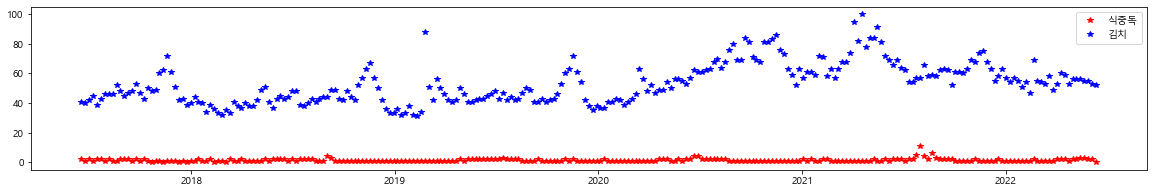

In [10]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure(figsize=(20,3))
plt.plot(df.index,df.식중독,'r*')
plt.plot(df.index,df.김치,'b*')
plt.legend(["식중독", "김치"])

In [5]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [39]:
TrendReq?

In [6]:
# build list of keywords
kw_list = ["ai", "chicken", "space"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-01-01', geo='US')

In [7]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

In [9]:
df

,ai,chicken,space,isPartial
date,,,,
2015-01-01,3,65,30,False
2015-02-01,3,60,30,False
2015-03-01,2,56,27,False
2015-04-01,3,53,29,False
2015-05-01,2,51,27,False
...,...,...,...,...
2020-09-01,4,81,28,False
2020-10-01,3,83,32,False
2020-11-01,3,81,26,False


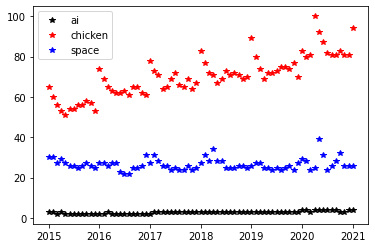

In [10]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure()
plt.plot(df.index,df.ai,'k*')
plt.plot(df.index,df.chicken,'r*')
plt.plot(df.index,df.space,'b*')
plt.legend(['ai','chicken','space'])

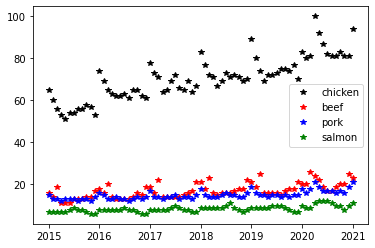

In [12]:
# build list of keywords
kw_list = ["chicken", "beef", "pork", "salmon"] 

# build the payload
pytrends.build_payload(kw_list, cat=None, timeframe='2015-01-01 2021-01-01', geo='US') 

# get the interest over time
df = pytrends.interest_over_time()

# plot food trends over time
plt.figure()
plt.plot(df.index,df.chicken,'k*')
plt.plot(df.index,df.beef,'r*')
plt.plot(df.index,df.pork,'b*')
plt.plot(df.index,df.salmon,'g*')
plt.legend(['chicken','beef','pork','salmon'])


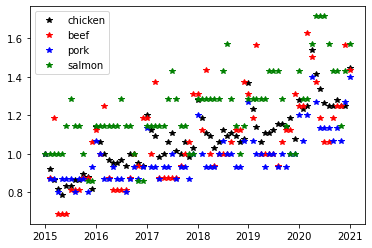

In [13]:
# plot normalized food trends over time
plt.figure()
plt.plot(df.index,df.chicken/df.chicken.iloc[0],'k*')
plt.plot(df.index,df.beef/df.beef.iloc[0],'r*')
plt.plot(df.index,df.pork/df.pork.iloc[0],'b*')
plt.plot(df.index,df.salmon/df.salmon.iloc[0],'g*')
plt.legend(['chicken','beef','pork','salmon'])

In [14]:
# build the payload
pytrends.build_payload(kw_list=['chicken'], timeframe='2015-01-01 2021-01-01', geo='US') 

# get related topics
df_rt = pytrends.related_topics()

In [16]:
print(df_rt)

{'chicken': {'rising':      value formattedValue                                               link  \
0   122600       Breakout  /trends/explore?q=/g/11f2wjbq6z&date=2015-01-0...   
1    19850       Breakout  /trends/explore?q=/g/11n5zkvv22&date=2015-01-0...   
2     4900        +4,900%  /trends/explore?q=/m/012l6kq_&date=2015-01-01+...   
3      700          +700%  /trends/explore?q=/m/080hx6n&date=2015-01-01+2...   
4      700          +700%  /trends/explore?q=/m/0130rtg7&date=2015-01-01+...   
5      350          +350%  /trends/explore?q=/m/0422xx&date=2015-01-01+20...   
6      250          +250%  /trends/explore?q=/m/03rt3y&date=2015-01-01+20...   
7      200          +200%  /trends/explore?q=/m/0423gr&date=2015-01-01+20...   
8      120          +120%  /trends/explore?q=/m/0dxmm&date=2015-01-01+202...   
9       90           +90%  /trends/explore?q=/m/03gq8yn&date=2015-01-01+2...   
10      90           +90%  /trends/explore?q=/m/0k5stv1&date=2015-01-01+2...   
11      80       

In [17]:
pd.DataFrame(df_rt)

,chicken
rising,value formattedValue ...
top,value formattedValue hasData \ 0 100...


In [19]:
# display top 5 rising results for the chicken keyword
print(df_rt['chicken']['rising'].head(5))

    value formattedValue                                               link  \
0  122600       Breakout  /trends/explore?q=/g/11f2wjbq6z&date=2015-01-0...   
1   19850       Breakout  /trends/explore?q=/g/11n5zkvv22&date=2015-01-0...   
2    4900        +4,900%  /trends/explore?q=/m/012l6kq_&date=2015-01-01+...   
3     700          +700%  /trends/explore?q=/m/080hx6n&date=2015-01-01+2...   
4     700          +700%  /trends/explore?q=/m/0130rtg7&date=2015-01-01+...   

       topic_mid          topic_title          topic_type  
0  /g/11f2wjbq6z          Instant Pot               Topic  
1  /g/11n5zkvv22    Air fryer chicken                Food  
2    /m/012l6kq_            Air fryer               Topic  
3     /m/080hx6n          Hot chicken                Food  
4    /m/0130rtg7  Chicken Salad Chick  Restaurant company  
